# How to: Create a reproducible computational workflow using Jupyter notebook
Content under Creative Commons Attribution license CC-BY-NC-SA 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

This notebook is an example of how to create a reproducible workflow using Jupyter notebook and python.  
There are 4 steps that make this workflow reproducible: change 
1. [Automatically download data from a repository](#download)  
2. [Automate data manipulation](#manipulation)
3. [Define seeds to generate random numbers](#seeds)
4. [Print dependences](#dependencies) 

The example coded in this notebook consists in the creation of an interactive literature review map of femoral knee cartilage segmentation. The map shows type of algorithm, location, first author and year of publication.
The input data is a `.csv` file on Zenodo (www.doi.org/10.5281/zenodo.3553483) containing data about the literature of femoral knee cartilage segmentation. 
There are 4 versions of this file on Zenodo that are used for three different YouTube videos: 
- Version 1 and 2: Used in the video [How to: Zenodo](https://youtu.be/S1qK_TA52e4)  
- Version 2: Used in the video [How to: Reproducible computational workflows](https://youtu.be/-9qSUJTuec8)
- Version 3: Not used in any video as it contains some empty columns added by mistake
- Version 4: Used in the video [How to: binder]()

---

In [1]:
import wget # to download from zenodo
import pandas as pd  
import numpy  as np
# from   geopy.geocoders import Nominatim
import altair as alt
import vega 
from   vega_datasets import data # for state contours 

In [2]:
alt.renderers.enable('notebook'); # for rendering in jupyter notebook

---
<a name = "download"></a>
## 1. Automatically download data from a repository

Input data should be in a repository that provides a **persistent digital object identifier (DOI)** so that data will be available in the future. It is *discouraged* to share data from **personal repositories** because links tend to get deleted, thus compromising the reproducibility of the workflow.
- Download the file `cart_segm_literature.csv` from Zenodo, open the downloaded file, and show the content


In [3]:
# file name and zenodo url
file_name  = "cart_segm_literature.csv"
zenodo_url = "https://zenodo.org/record/3553483/files/" # 3553483 are the last digits of the specific version of dataset DOI

In [4]:
# download
wget.download(zenodo_url + file_name, "./" + file_name) # input, output

'./cart_segm_literature.csv'

- Load the file `cart_segm_literature.csv` 
- Show data in file

In [5]:
# load literature table
literature = pd.read_csv("./" + file_name)

In [6]:
# show data

# display all rows and columns
dataDimension = literature.shape # get number of rows
pd.set_option("display.max_rows",5)
pd.set_option("display.max_columns",dataDimension[1])

# show
literature

,algorithm_type,bibtex_id,author_1,author_2,author_3,author_4,author_5,author6,author_7,author_8,affiliation_last_author,city_last_author,country_last_author,title,journal,year,link_to_pubmed,latitude,longitude
0,active contours,Solloway_1997,﻿Solloway S,Hutchinson CE,Waterton JC,Taylor CJ,NaN,NaN,NaN,NaN,"Department of Medical Biophysics, University o...",Manchester,UK,﻿The use of active shape models for making thi...,﻿Magn Reson Med 37(6):943–952,1997,https://www.ncbi.nlm.nih.gov/pubmed/9178247,53.479489,-2.245115
1,active contours,Vincent_2011,﻿Vincent G,Wolstenholme C,Scott I,Bowes M,NaN,NaN,NaN,NaN,Imorphics Ltd.,Manchester,UK,﻿Fully Automatic Segmentation of the Knee Join...,﻿MICCAI 2010 Workshop Medical Image Analysis f...,2011,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,53.479489,-2.245115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,hybrid,Seim_2010,Seim H,Kainmueller D,Lamecker H,Bindernagel M,Malinowski J,Zachow S,NaN,NaN,"Zuse Institute Berlin (ZIB), Medical Planning ...",Berlin,Germany,﻿Model-based auto-segmentation of knee bones a...,﻿Medical Image Analysis for the Clinic: A Gran...,2010,NaN,52.517037,13.388860
28,hybrid,Dam_2015,Dam ﻿E B,Lillholm M,Marques J,Nielsen M,NaN,NaN,NaN,NaN,Biomediq and University of Copenhagen,Copenhagen,Denmark,Automatic segmentation of high- and low-field ...,"﻿SPIE Journal of Medical Imaging, vol. 2, pp....",2015,https://www.ncbi.nlm.nih.gov/pubmed/26158096,55.686724,12.570072


---
<a name = "manipulation"></a>
## 2. Automate data manipulation

**Automatic** data manipulation does not compromise original data and keeps track of manipulations, making analyses reproducible. It is *discouraged* to do **manual** manipulation, as it compromizes original data, is prone to errors, and does not keep track of changes, making analyses hardly reproducible.

- Change `bibtext_id` format from `author_year` to `author (year)` for better readability when hovering (e.g. from `Solloway_1997` to `Solloway (1997)`)

In [7]:
# replace underscore with space and opening bracket
literature["bibtex_id"] = literature["bibtex_id"].str.replace('_',' (')
# adding closing bracket
literature["bibtex_id"] = literature["bibtex_id"].astype(str) + ")"  

# show table
literature

,algorithm_type,bibtex_id,author_1,author_2,author_3,author_4,author_5,author6,author_7,author_8,affiliation_last_author,city_last_author,country_last_author,title,journal,year,link_to_pubmed,latitude,longitude
0,active contours,Solloway (1997),﻿Solloway S,Hutchinson CE,Waterton JC,Taylor CJ,NaN,NaN,NaN,NaN,"Department of Medical Biophysics, University o...",Manchester,UK,﻿The use of active shape models for making thi...,﻿Magn Reson Med 37(6):943–952,1997,https://www.ncbi.nlm.nih.gov/pubmed/9178247,53.479489,-2.245115
1,active contours,Vincent (2011),﻿Vincent G,Wolstenholme C,Scott I,Bowes M,NaN,NaN,NaN,NaN,Imorphics Ltd.,Manchester,UK,﻿Fully Automatic Segmentation of the Knee Join...,﻿MICCAI 2010 Workshop Medical Image Analysis f...,2011,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,53.479489,-2.245115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,hybrid,Seim (2010),Seim H,Kainmueller D,Lamecker H,Bindernagel M,Malinowski J,Zachow S,NaN,NaN,"Zuse Institute Berlin (ZIB), Medical Planning ...",Berlin,Germany,﻿Model-based auto-segmentation of knee bones a...,﻿Medical Image Analysis for the Clinic: A Gran...,2010,NaN,52.517037,13.388860
28,hybrid,Dam (2015),Dam ﻿E B,Lillholm M,Marques J,Nielsen M,NaN,NaN,NaN,NaN,Biomediq and University of Copenhagen,Copenhagen,Denmark,Automatic segmentation of high- and low-field ...,"﻿SPIE Journal of Medical Imaging, vol. 2, pp....",2015,https://www.ncbi.nlm.nih.gov/pubmed/26158096,55.686724,12.570072


---
<a name = "seeds"></a>
## 3. Define seeds to generate random numbers

Algorithms create random numbers starting from a seed number (usually picked from the system clock) and following a set of instructions that output the wanted random number. **Fixing the seed number** allows to always compute the same random number.

- Calculate latitude and longitude of `city_last_author` and add small random number to avoid overlap on map
- *Note*: The cell below contains the commands to compute `latitude` and `longitude` from `city_last_author` using the `geopy` package. The cell is commented out because `geopy` often times out, affecting the execution of the notebook. For this reason, the columns `latitude` and `longitude` are already included in version 4 of the file `cart_segm_literature.csv` on Zenodo

In [8]:
# calculate latitute and longitude 
# (timeout error can happen. wait a bit, and rerun the cell)
# nom = Nominatim(user_agent="a_name") # specify a name to avoid timeout errors

# add latitude and longitude to literature
# literature["coordinates"] = literature["city_last_author"].apply(nom.geocode, timeout=5) # create the intermediate columm "coordinates" to take advantage of pandas apply() method
# literature["latitude"]    = literature["coordinates"].apply(lambda x: x.lat if x!=None else None) # take advantage of pandas apply() method to avoid for loop
# literature["longitude"]   = literature["coordinates"].apply(lambda x: x.lon if x!=None else None) 
# literature = literature.drop(columns="coordinates") # delete the column "coordinates" (altair will not be able to read it (even if not used))

In [9]:
# FIRST RUN
np.random.seed(seed=3) # if this is not present, the cell is not reproducible

# add randomness to latitude
random_lat = np.random.uniform(low=0.0, high=2.5, size=(len(literature["latitude"]),))
literature["latitude_random"] = literature["latitude"] + pd.Series(random_lat)

# add randomness to longitude
random_lon = np.random.uniform(low=0.0, high=2.5, size=(len(literature["longitude"]),))
literature["longitude_random"] = literature["longitude"] + pd.Series(random_lon)

# show 
pd.set_option("display.max_rows",3) # show only the first three rows
literature [["latitude", "latitude_random", "longitude", "longitude_random"]] # show only these columns

,latitude,latitude_random,longitude,longitude_random
0,53.479489,54.856484,-2.245115,0.095844
...,...,...,...,...
28,55.686724,56.656652,12.570072,14.436938


In [10]:
# SECOND RUN
np.random.seed(seed=3) # if this is not present, the cell is not reproducible

# add randomness to latitude
random_lat = np.random.uniform(low=0.0, high=2.5, size=(len(literature["latitude"]),))
literature["latitude_random"] = literature["latitude"] + pd.Series(random_lat)

# add randomness to longitude
random_lon = np.random.uniform(low=0.0, high=2.5, size=(len(literature["longitude"]),))
literature["longitude_random"] = literature["longitude"] + pd.Series(random_lon)

# show literature
pd.set_option("display.max_rows",3) # show only the first three rows
literature [["latitude", "latitude_random", "longitude", "longitude_random"]] # show only these columns

,latitude,latitude_random,longitude,longitude_random
0,53.479489,54.856484,-2.245115,0.095844
...,...,...,...,...
28,55.686724,56.656652,12.570072,14.436938


## Visualize map
- Show the interactive map

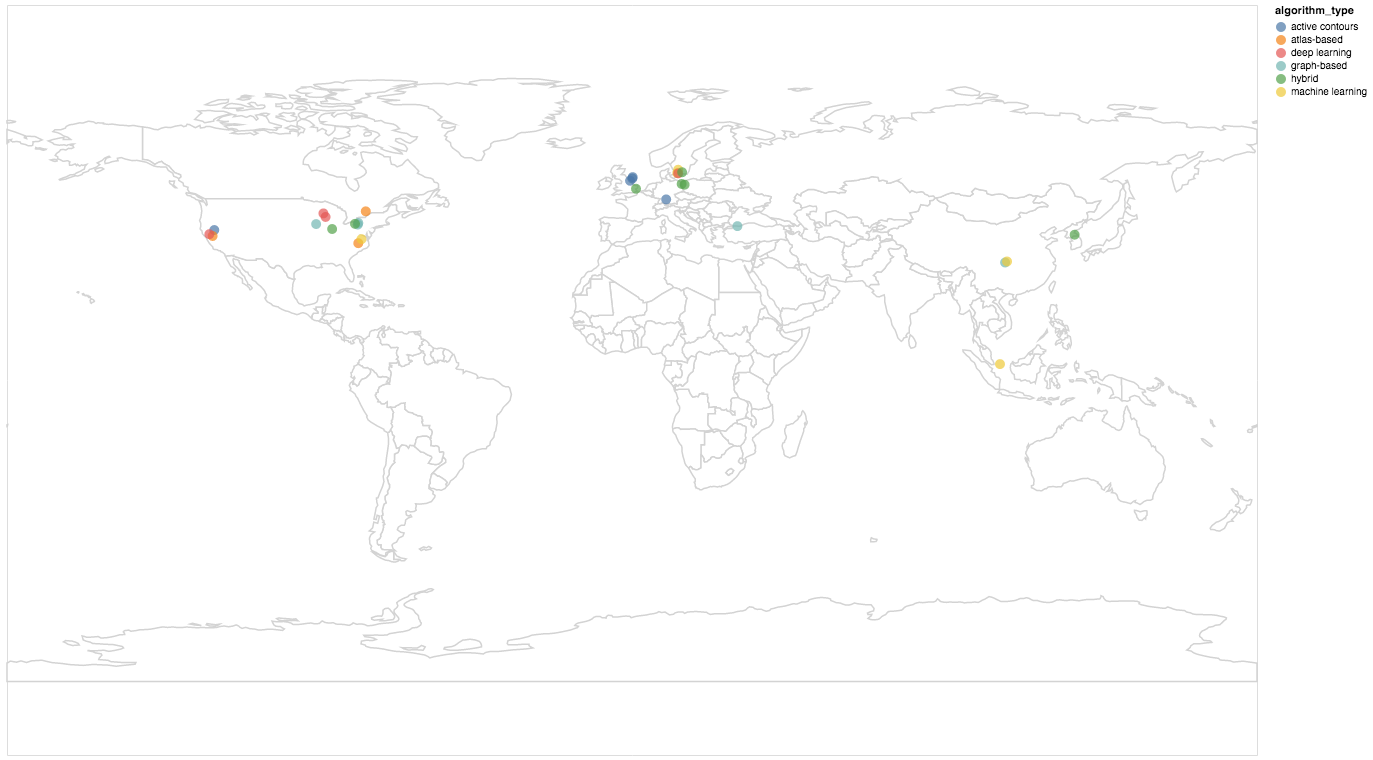

In [11]:
# import coordinates of countries to create the background map
countries = alt.topo_feature(data.world_110m.url, 'countries')

# create map
background = alt.Chart(countries).mark_geoshape(
    fill        = 'white',
    stroke      = 'lightgray',
    strokeWidth = 1.5
).project(
    "equirectangular"
).properties(
    width  = 1250,
    height = 750
)

# create points
points = alt.Chart(literature).mark_circle().encode(
    longitude = 'longitude_random:Q',
    latitude  = 'latitude_random:Q',
    size      = alt.value(100),
    color     = 'algorithm_type',
    tooltip   = 'bibtex_id' # name of each point when hovering
    
)

# show
background + points 

<a name="dependencies"></a>
## 4. Print dependences

Dependences are fundamental to record the **computational environment**.   

- Use [watermark](https://github.com/rasbt/watermark) to print version of python, ipython, and packages, and characteristics of the computer

In [12]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark 

# date
print (" ")
%watermark -u -n -t -z 

CPython 3.7.4
IPython 7.8.0

wget 3.2
pandas 0.25.1
numpy 1.17.2
geopy 1.20.0
altair 3.2.0
vega 2.6.0
vega_datasets 0.7.0
watermark 2.0.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
 
last updated: Tue Nov 26 2019 09:35:00 CET
